# TabNet Classifier

*   Jacob Yousif


## Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%capture


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import joblib
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import label_binarize

## Process

In [6]:
npz_file_path = 'datasets/hypertuning_train_set/LearningSet.npz'
data = np.load(npz_file_path, allow_pickle=True)

In [7]:
X_test = data['X_test']
y_test = data['y_test']

In [8]:
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")

Testing Set: (24412, 42), Labels: (24412,)


In [9]:
best_tabnet = joblib.load('models/TabNetModel.joblib')

In [10]:
y_pred = best_tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12859
           1       0.39      0.07      0.11       282
           2       0.00      0.00      0.00       305
           3       0.68      0.55      0.60      3144
           4       0.49      0.45      0.47       218
           5       0.75      0.75      0.75      1499
           6       0.79      0.80      0.79      4115
           7       0.20      0.40      0.26       825
           8       0.00      0.00      0.00        25
           9       1.00      0.79      0.88      1140

    accuracy                           0.80     24412
   macro avg       0.52      0.47      0.48     24412
weighted avg       0.80      0.80      0.80     24412



In [12]:
performance_metrics = {'Accuracy': [accuracy], 'F1': [f1], 'Precision': [precision], 'Recall': [recall]}

In [13]:
metrics = pd.DataFrame(performance_metrics)

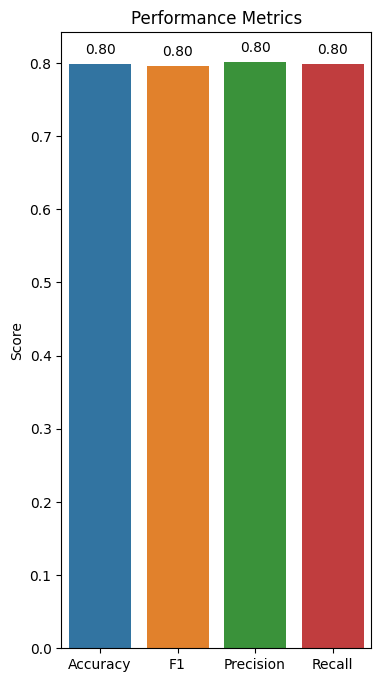

In [14]:
plt.figure(figsize=(4, 8))
ax = sns.barplot(data=metrics)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha = 'center',  
                va = 'center',  
                xytext = (0, 10),  
                textcoords = 'offset points')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.savefig('figures/classifications/TabNetPerformanceMetrics.pdf', bbox_inches='tight')
plt.show()

In [15]:
categories = {
    0: 'Normal', 
    1: 'Backdoor', 
    2: 'Analysis', 
    3: 'Fuzzers', 
    4: 'Shellcode', 
    5: 'Reconnaissance', 
    6: 'Exploits', 
    7: 'DoS', 
    8: 'Worms', 
    9: 'Generic'
}

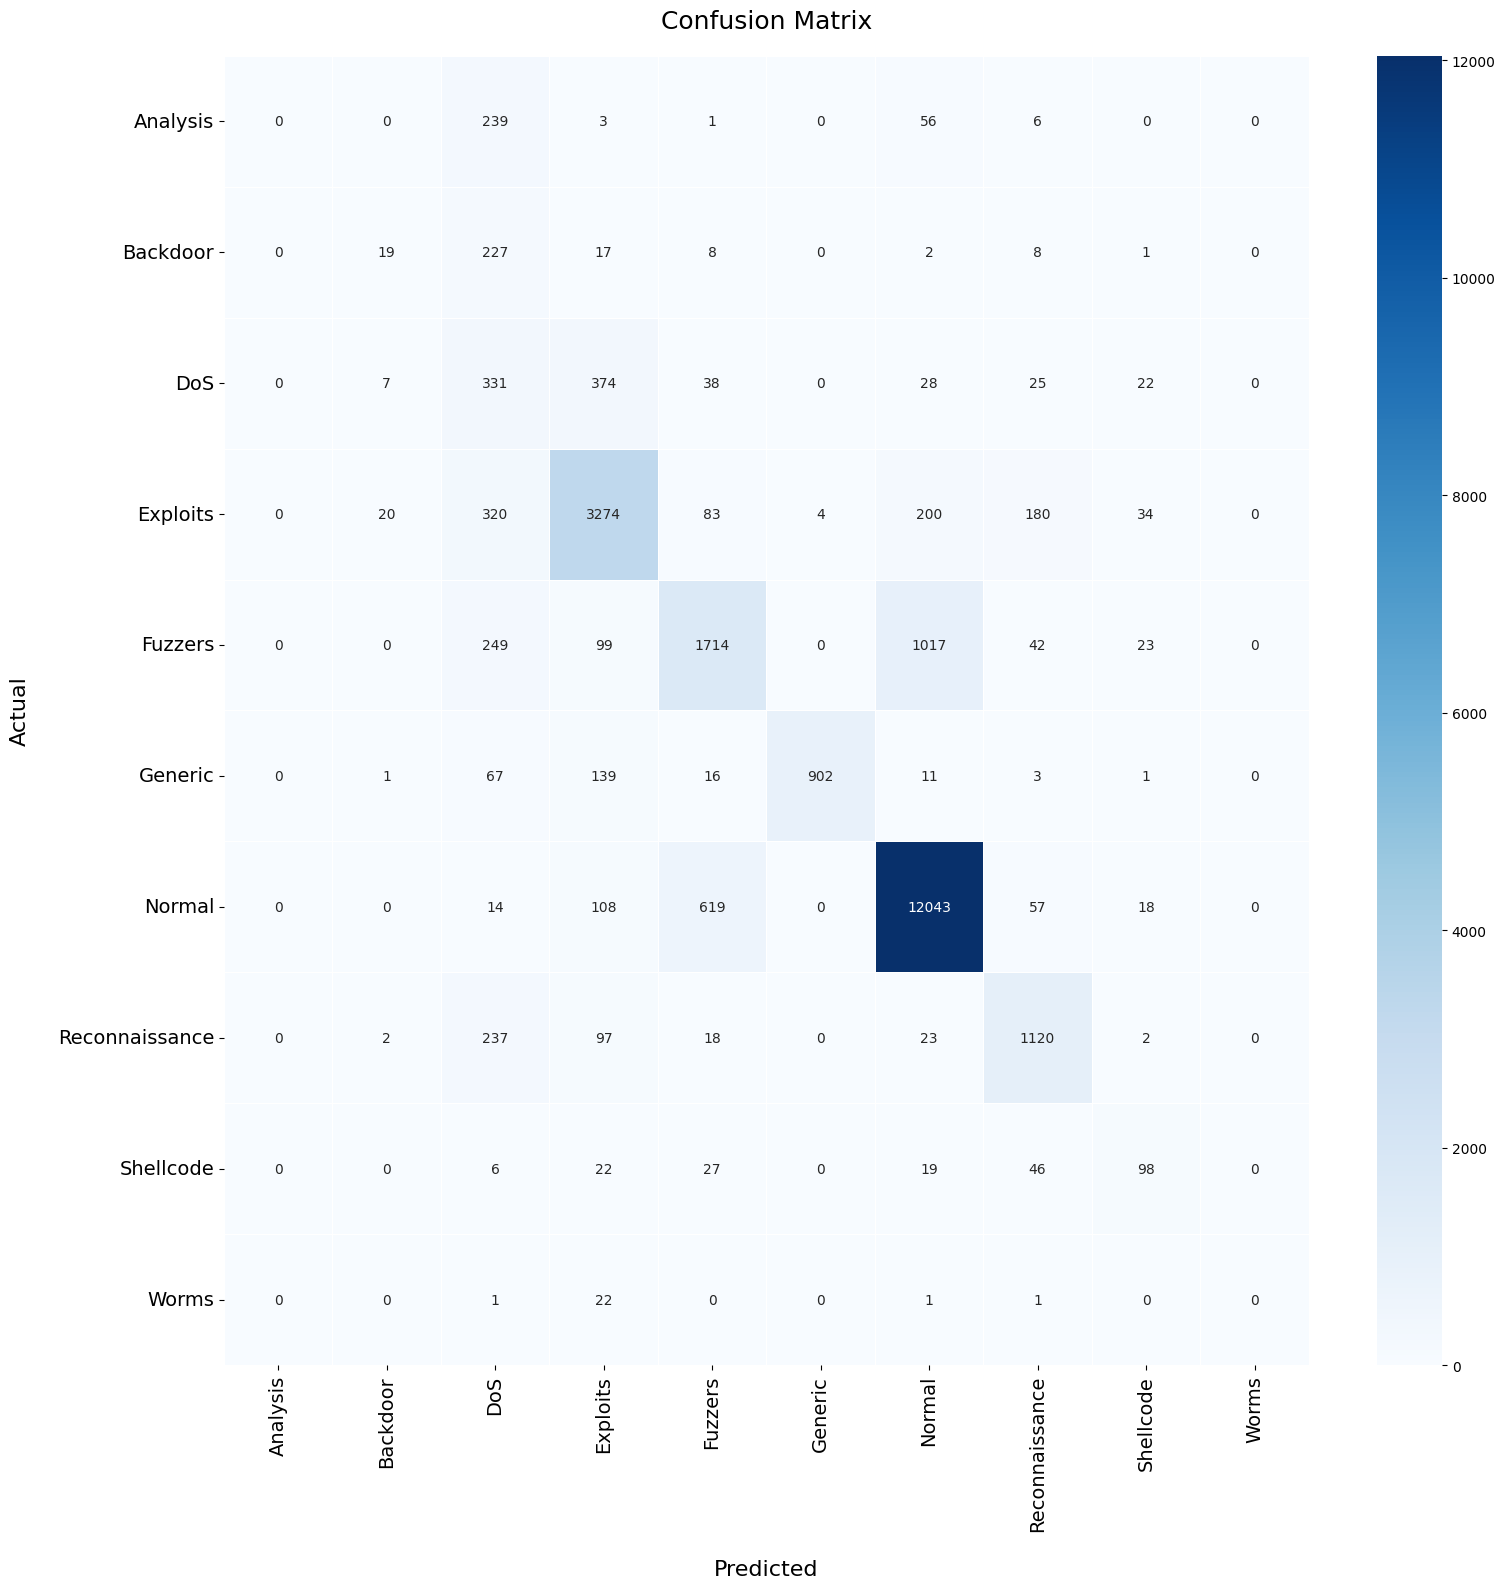

In [16]:
sorted_indices = sorted(categories, key=lambda i: categories[i])


cm = confusion_matrix(y_test, y_pred, labels=sorted_indices)

categories_names = [categories[i] for i in sorted_indices]

plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, xticklabels=categories_names, yticklabels=categories_names)

plt.xlabel('Predicted', labelpad=20, fontsize=16)
plt.ylabel('Actual', labelpad=20, fontsize=16)
plt.title('Confusion Matrix', pad=20, fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.savefig('figures/classifications/TabNetConfusionMatrix.pdf', bbox_inches='tight')
plt.show()